## k Neighbors Regression with temperature data

In [1]:
import numpy as np
import pandas as pd
import scipy, scipy.stats
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_json("monthly_json.json") 
data['Date'] = pd.to_datetime(data['Date'])

In [3]:
pivot_df = data.pivot(index='Date', columns='Source', values='Mean')

In [4]:
pivot_df.head()

Source,GCAG,GISTEMP
Date,,
1880-01-06,0.0009,-0.30
1880-02-06,-0.1229,-0.21
1880-03-06,-0.1357,-0.18
1880-04-06,-0.0499,-0.27
1880-05-06,-0.0738,-0.14


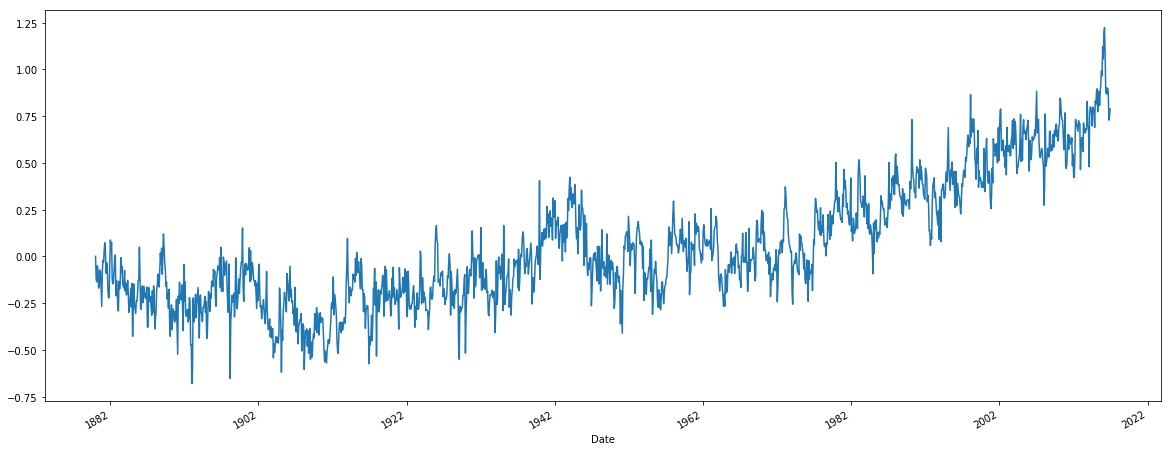

In [5]:
 GCAG_data = pivot_df['GCAG'].plot(figsize=(20, 8))

In [6]:
GCAG_data = pivot_df['GCAG']

X = GCAG_data.index.values.astype(np.int64) / 1000000000 
X = X.reshape(-1, 1)
X

array([[-2.8397088e+09],
       [-2.8370304e+09],
       [-2.8345248e+09],
       ...,
       [ 1.4757120e+09],
       [ 1.4783904e+09],
       [ 1.4809824e+09]])

In [7]:
y = pivot_df['GCAG'].values
y

array([ 0.0009, -0.1229, -0.1357, ...,  0.7292,  0.7504,  0.7895])

In [8]:
pivot_df.head()

Source,GCAG,GISTEMP
Date,,
1880-01-06,0.0009,-0.30
1880-02-06,-0.1229,-0.21
1880-03-06,-0.1357,-0.18
1880-04-06,-0.0499,-0.27
1880-05-06,-0.0738,-0.14


Aufgabe:<br/>
<br/>Implementiere Logistische Regression
<br/>Teile die Daten in ein Train- und Test-set
<br/>Berechne Trainings- und Test- Fehler für KNR und Lineare Regression

In [9]:
data_copy = pivot_df.copy()
train_data = data_copy[:1200]
test_data = data_copy[1200:]

In [10]:
test_data.head()

Source,GCAG,GISTEMP
Date,,
1980-01-06,0.3080,0.30
1980-02-06,0.3506,0.42
1980-03-06,0.2389,0.29
1980-04-06,0.3082,0.32
1980-05-06,0.3160,0.34


In [11]:
train_data.head()

Source,GCAG,GISTEMP
Date,,
1880-01-06,0.0009,-0.30
1880-02-06,-0.1229,-0.21
1880-03-06,-0.1357,-0.18
1880-04-06,-0.0499,-0.27
1880-05-06,-0.0738,-0.14


In [12]:
def k_neighbors_regression (X,y,n):
    neigh = KNeighborsRegressor(n_neighbors=n)
    labels = neigh.fit(X,y).predict(X)
    y = pd.DataFrame(y)
    #y['Labels'] = labels
    #y.columns = ['k='+str(n)]
    return y

In [13]:
GCAG_traindata = train_data['GCAG']
X_train = GCAG_traindata.index.values.astype(np.int64) / 1000000000 
X_train = X_train.reshape(-1, 1)
y_train = train_data['GCAG'].values


In [14]:
k_neighbors_regression(X_train,y_train,1).head()

,0
0,0.0009
1,-0.1229
2,-0.1357
3,-0.0499
4,-0.0738


In [15]:
k_neighbors_regression(X_train,y_train,2).head()

,0
0,0.0009
1,-0.1229
2,-0.1357
3,-0.0499
4,-0.0738


In [16]:
df = pd.DataFrame(GCAG_traindata)
for i in range (1,10):
     df['k='+str(i)]=(k_neighbors_regression(X_train,y_train,i))


In [21]:
#result_df = pd.DataFrame(GCAG_traindata)
result_df = k_neighbors_regression(X_train,y_train,1)
result_df['k=2'] = k_neighbors_regression(X_train,y_train,2)
result_df.columns = ['k=1','k=2']
result_df['k=3'] = k_neighbors_regression(X_train,y_train,3)
result_df['k=4'] = k_neighbors_regression(X_train,y_train,4)
result_df['k=5'] = k_neighbors_regression(X_train,y_train,5)
result_df['k=6'] = k_neighbors_regression(X_train,y_train,6)
result_df.head()

,k=1,k=2,k=3,k=4,k=5,k=6
0,0.0009,0.0009,0.0009,0.0009,0.0009,0.0009
1,-0.1229,-0.1229,-0.1229,-0.1229,-0.1229,-0.1229
2,-0.1357,-0.1357,-0.1357,-0.1357,-0.1357,-0.1357
3,-0.0499,-0.0499,-0.0499,-0.0499,-0.0499,-0.0499
4,-0.0738,-0.0738,-0.0738,-0.0738,-0.0738,-0.0738


In [ ]:
neighborreg = KNeighborsRegressor(n_neighbors=5)
labels = neighborreg.fit(X,y).predict(X)
y = pd.DataFrame(y)
y['Labels'] = labels
y.head()

In [ ]:
neighborreg = KNeighborsRegressor(n_neighbors=5)
labels = neighborreg.fit(X,y).predict(X)
y = pd.DataFrame(y)
y['Labels'] = labels
y.columns = ['Given','Predicted']
y.head()

In [ ]:
A = neighborreg.kneighbors_graph(X)

In [ ]:
A.toarray()

In [ ]:
#accuracy_score(y['Given'],y['Predicted'])

## This doesn't work yet

In [ ]:
def k_neighbors_regression (X,y,n):
    neigh = KNeighborsRegressor(n_neighbors=5)
    labels = neigh.fit(X,y).predict(X)
    y = pd.DataFrame(y)
    y['Labels'] = labels
    y.columns = ['Given','Predicted']
    return y
    #y['Labels'] = labels
    #return y.head()

In [ ]:
data_copy = pivot_df.copy()
train_data = data_copy[:1200]
test_data = data_copy[1200:]

In [ ]:
GCAG_traindata = train_data['GCAG']
X_train = GCAG_traindata.index.values.astype(np.int64) / 1000000000 
X_train = X_train.reshape(-1, 1)
y_train = train_data['GCAG'].values

In [ ]:
train_data.head()

In [ ]:
df.head()

In [ ]:
#def k_neighbors_regression (X,y,n):
#    neigh = KNeighborsRegressor(n_neighbors=5)
#    labels = neigh.fit(X,y).predict(X)
#    y = pd.DataFrame(labels)
#    #y['Labels'] = labels
#    #y.columns = ['Given','Predicted']
#    return y
#chart['k=1'] = k_neighbors_regression(X_train,y_train,1)
#chart['k=10'] = k_neighbors_regression(X_train,y_train,10)
#chart

In [ ]:
# Test again with complete data

GCAG_data = pivot_df['GCAG']

M = GCAG_data.index.values.astype(np.int64) / 1000000000 
M = M.reshape(-1, 1)

mm = pivot_df['GCAG'].values

for i in range (0,12):
    a = "k = "+ str(i)
    train_data['a']= k_neighbors_regression(X_train,y_train,i)
#k_neighbors_regression(M,mm,3)

In [ ]:
#a = k_neighbors_regression(X_train,y_train,3)['Given']
#b = k_neighbors_regression(X_train,y_train,3)['Predicted']